# Machine learning Ensup

---

## Imports

In [321]:
import numpy as np
import pandas as pd
import os
import json
from ast import literal_eval
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns  # for coloring 

## Dataset loading

In [322]:
df_2015 = pd.read_csv("../data/2015-building-energy-benchmarking.csv")
df_2016 = pd.read_csv("../data/2016-building-energy-benchmarking.csv")
pd.options.display.max_columns = 50

## Data cleaning

In [323]:
print(f"Df 2015 SHAPE : {df_2015.shape} | Df 2016 SHAPE : {df_2016.shape}")

Df 2015 SHAPE : (3340, 47) | Df 2016 SHAPE : (3376, 46)


In [324]:
print(f"Df 2015 DUPLICATE : {df_2015[df_2015.duplicated()].shape} | Df 2016 DUPLICATE : {df_2016[df_2016.duplicated()].shape}")

Df 2015 DUPLICATE : (0, 47) | Df 2016 DUPLICATE : (0, 46)


In [325]:
df_2015.head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL                     659000030   
1        PARAMOUNT HOTEL                     659000220   
2           WESTIN HOTEL                     659000475   
3              HOTEL MAX                     659000640   
4  WARWICK SEATTLE HOTEL                     659000970   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   
3  {'latitude': '47.61421585', 'longitude': '-122...                    7   
4  {'latitude': '47.6137544', 'longitude': '-122....                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   
3     DOWNTOWN       1926                  1            10.0   
4     DOWNTOWN       1980                  1            18.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   
3             61320                   0                   61320   
4            119890               12460                  107430   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   
3                          Hotel                  Hotel   
4  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   
3                    61320.0                          NaN   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   
3                              NaN                         NaN   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   
3                             NaN                      NaN              1.0   
4                             0.0                      NaN             67.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   
3             460.4               462.5               636.3   
4             120.1               122.1               228.8   

   SourceEUIWN(kBtu/sf)  SiteEner

In [326]:
df_2016.head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [327]:
# Get all different value without "Seattle"
df_2016[df_2016['City'] != 'Seattle']

# Get all unique value of a column
df_ = list(df_2016['City'].unique())

In [328]:
def compare_cols(df1, df2):
    """
        Compare two dataset and get the list of columns differences
        
    """
    df1_idx = list(df1.columns)
    df2_idx = list(df2.columns)
    
    diff_list_df1 = []
    diff_list_df2 = []
    
    for item in df1_idx:
        if item not in df2_idx:
            diff_list_df1.append(item)
            
    for item in df2_idx:
        if item not in df1_idx:
            diff_list_df2.append(item)
    
    return diff_list_df1, diff_list_df2

In [329]:
compare_cols(df_2015, df_2016)

(['Location',
  'OtherFuelUse(kBtu)',
  'GHGEmissions(MetricTonsCO2e)',
  'GHGEmissionsIntensity(kgCO2e/ft2)',
  'Comment',
  '2010 Census Tracts',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'City Council Districts',
  'SPD Beats',
  'Zip Codes'],
 ['Address',
  'City',
  'State',
  'ZipCode',
  'Latitude',
  'Longitude',
  'Comments',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'])

In [330]:
df_2015_ = df_2015['Location'].map(literal_eval).apply(pd.Series)

In [331]:
df_2015_2 = df_2015_['human_address'].map(literal_eval).apply(pd.Series)

In [332]:
df_2015_final = pd.concat([df_2015_.drop(['human_address'], axis=1), df_2015_2], axis=1)

In [333]:
df_2015 = pd.concat([df_2015.drop(['Location'], axis=1), df_2015_final], axis=1)

In [334]:
compare_cols(df_2015, df_2016)

(['OtherFuelUse(kBtu)',
  'GHGEmissions(MetricTonsCO2e)',
  'GHGEmissionsIntensity(kgCO2e/ft2)',
  'Comment',
  '2010 Census Tracts',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'City Council Districts',
  'SPD Beats',
  'Zip Codes',
  'latitude',
  'longitude',
  'address',
  'city',
  'state',
  'zip'],
 ['Address',
  'City',
  'State',
  'ZipCode',
  'Latitude',
  'Longitude',
  'Comments',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'])

In [335]:
# Rename columns issue
df_2015.rename(columns={"latitude":"Latitude", 
                        "longitude": "Longitude", 
                        "address": "Address", 
                        "zip": "ZipCode", 
                        "city": "City", 
                        "state": "State", 
                        "GHGEmissionsIntensity(kgCO2e/ft2)": "GHGEmissionsIntensity", 
                        "GHGEmissions(MetricTonsCO2e)" : "TotalGHGEmissions"}, 
               inplace=True)

In [336]:
list1, list2 = compare_cols(df_2015, df_2016)

In [337]:
# Drop unused features
df_2015 = df_2015.drop(list1, axis=1)
df_2016 = df_2016.drop(list2, axis=1)

In [338]:
compare_cols(df_2015, df_2016)

([], [])

In [339]:
print(f"Df 2015 SHAPE : {df_2015.shape} | Df 2016 SHAPE : {df_2016.shape}")

Df 2015 SHAPE : (3340, 45) | Df 2016 SHAPE : (3376, 45)


In [340]:
df_final = pd.concat([df_2015, df_2016])

In [341]:
df_final.shape

(6716, 45)

In [342]:
df_final.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
TaxParcelIdentificationNumber         2
CouncilDistrictCode                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        8
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes           136
LargestPropertyUseType              156
LargestPropertyUseTypeGFA           156
SecondLargestPropertyUseType       3478
SecondLargestPropertyUseTypeGFA    3478
ThirdLargestPropertyUseType        5560
ThirdLargestPropertyUseTypeGFA     5560
YearsENERGYSTARCertified           6487
ENERGYSTARScore                    1623
SiteEUI(kBtu/sf)                     17
SiteEUIWN(kBtu/sf)                   16


In [343]:
df_final = df_final.dropna(subset=['TotalGHGEmissions','GHGEmissionsIntensity', 'SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)'])

/tmp/ipykernel_31473/1587571283.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_final.corr()


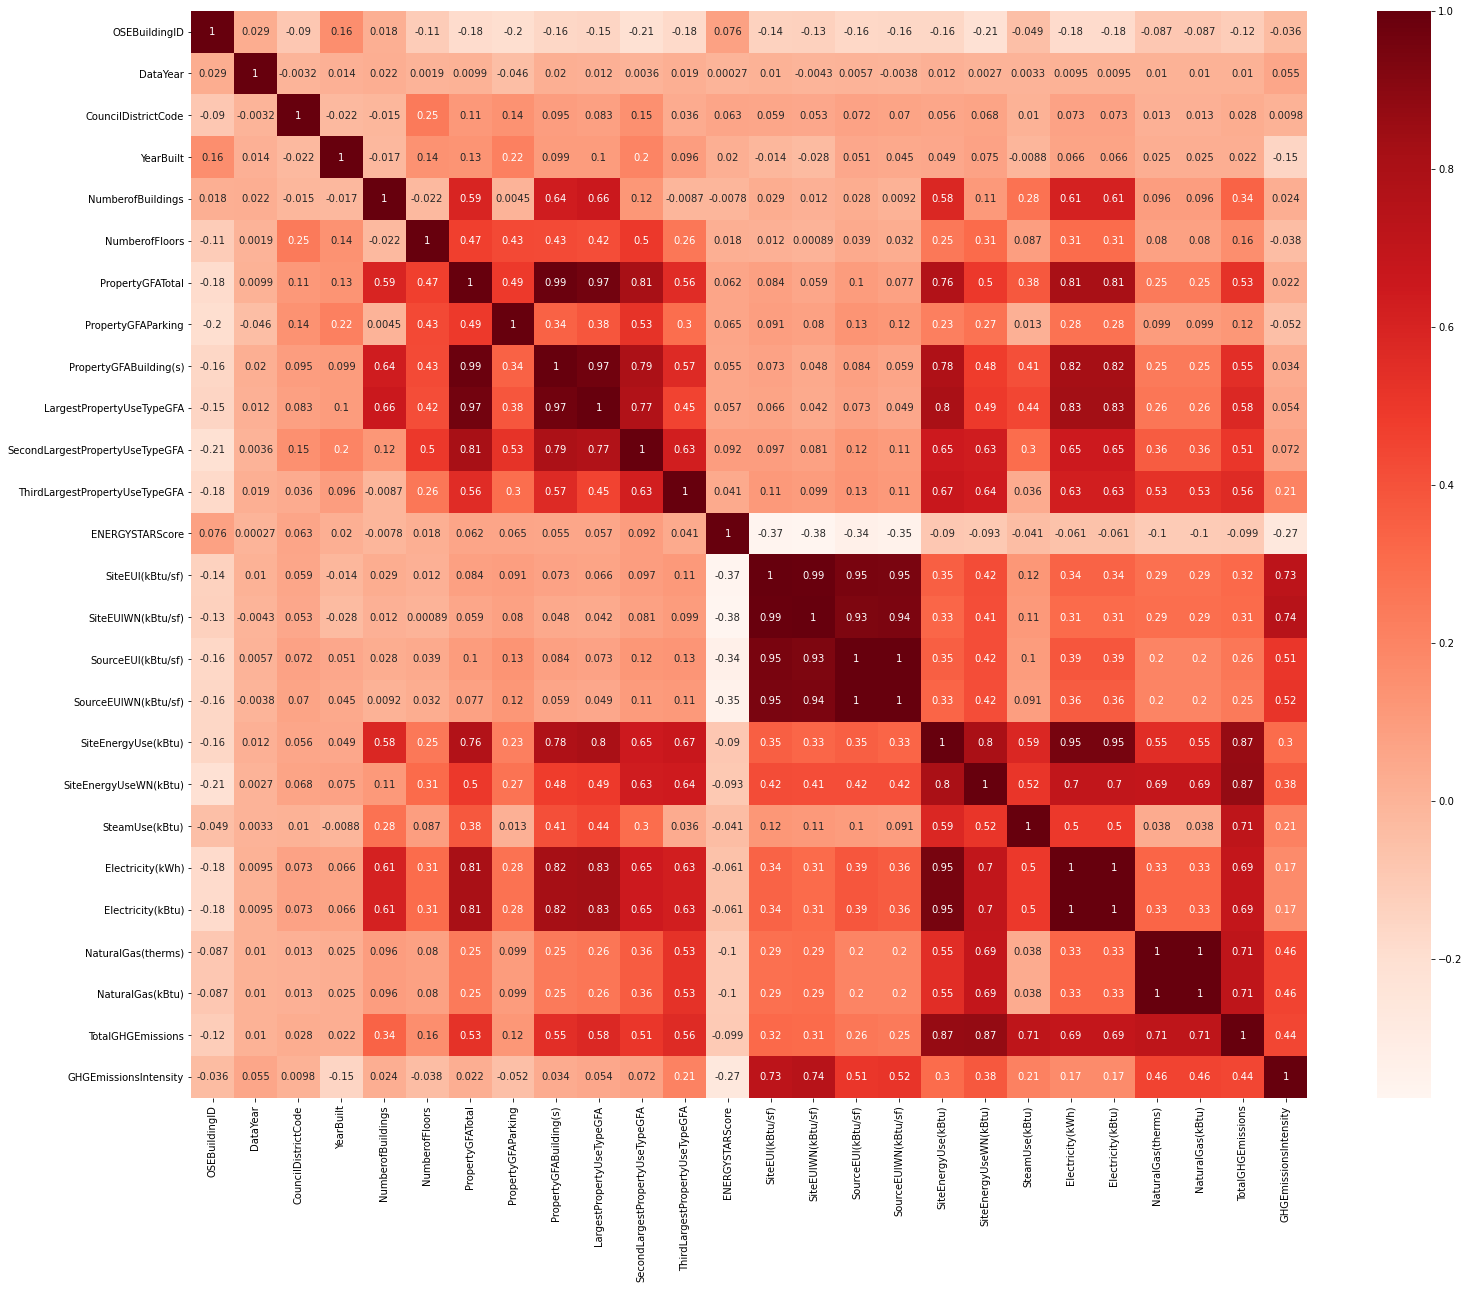

In [344]:
# Check Correlation
plt.figure(figsize=(25,20))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [345]:
# Save final dataset to CSV
df_final.to_csv('../data/building-energy-benchmarking-final.csv', index=False)

---

## Data Analyse

In [346]:
df = pd.read_csv('../data/building-energy-benchmarking-final.csv')

In [347]:
df.shape

(6694, 45)

In [360]:
df.head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0   MAYFLOWER PARK HOTEL                     659000030                    7   
1        PARAMOUNT HOTEL                     659000220                    7   
2           WESTIN HOTEL                     659000475                    7   
3              HOTEL MAX                     659000640                    7   
4  WARWICK SEATTLE HOTEL                     659000970                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                1.0            12.0   
1     DOWNTOWN       1996                1.0            11.0   
2     DOWNTOWN       1969                1.0            41.0   
3     DOWNTOWN       1926                1.0            10.0   
4     DOWNTOWN       1980                1.0            18.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   
3             61320                   0                   61320   
4            119890               12460                  107430   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   
3                          Hotel                  Hotel   
4  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   
3                    61320.0                          NaN   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   
3                              NaN                         NaN   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   
3                             NaN                      NaN              1.0   
4                             0.0                      NaN             67.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   
3             460.4               462.5               636.3   
4             120.1               122.1               228.8   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   
2                 246.5           73130656.0             75506272.0   
3                 643.2           28229320.0             28363444.0   
4              

### Seperate X and Y

In [361]:
X = df.drop(["TotalGHGEmissions", "BuildingType"], axis=1)
y = df["TotalGHGEmissions"]

print(f"X shape : {X.shape} | y shape : {y.shape}")

X shape : (6694, 43) | y shape : (6694,)


In [364]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6694 non-null   int64  
 1   DataYear                         6694 non-null   int64  
 2   PrimaryPropertyType              6694 non-null   object 
 3   PropertyName                     6694 non-null   object 
 4   TaxParcelIdentificationNumber    6692 non-null   object 
 5   CouncilDistrictCode              6694 non-null   int64  
 6   Neighborhood                     6694 non-null   object 
 7   YearBuilt                        6694 non-null   int64  
 8   NumberofBuildings                6694 non-null   float64
 9   NumberofFloors                   6686 non-null   float64
 10  PropertyGFATotal                 6694 non-null   int64  
 11  PropertyGFAParking               6694 non-null   int64  
 12  PropertyGFABuilding(

In [362]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [363]:
sel.fit_transform(X)

ValueError: could not convert string to float: 'Hotel'